### In this programming assignment, we will classify IMDB reviews into positive and negative reviews.
### We will download the raw IMDB reviews in text format. To convert the words into tensors, we use word embeddings.
### We will first use one of the pre-trained GloVe word embeddings. And then try to improve the embedding.
### To evaluate wether one embedding is better than the other, we use a list of positive words, and a list of negative words. We check how the positive words and negative words are spread in an embedding.  Ideally, we want all the positive words to be very close, and all the negative words to be very close in the embedding space, while positive words and negative words be far away from each other. We will define a function to measure how good an embedding is to sperate positive and negative words.
### Using this function, we evaluate the following three embeddings.
- The glove embedding: we use the pre-trained 100 dimensional GloVe word embedding
- The dense embedding: we use the glove embedding as the initial embbedding, and jointly train the embedding and the calssifier using a densely connected network. We call the resultant embedding the dense embedding.
- The LSTM embedding: we use the glove embedding as the initial embedding, and jontly train the embedding and the classifier using a LSTM model. We call the resultant embedding the LSTM embedding.

### From the above three candidates, we choose the best embedding and stack two GRU layers to build our classifier. We use the dropout and recurrent_dropout to fight overfitting. Our goal is to obtain a classifier that can achieve 90% of accuracy. Note 90% is not an easy target. We need to save the best model during the trainning, and load the best model when we do the testing.

### Note you only need to fill in part of the code. But you do need to run all the code and generate your own results. Your results could be different from mine.

### Note you need to follow the textbook to download the IMDB text reviews and the GloVe embeddings.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

### First we read a list of positive words from a file. Then we read a list of negative words from another file.

In [2]:
filepath = 'positive.txt'
L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

witty
won
wonder
wonderful
wonderfully
wonderous
wonderously
wonders
wondrous
woo
work
workable
worked
works
world-famous
worth
worth-while
worthiness
worthwhile
worthy
wow
wowed
wowing
wows
yay
youthful
zeal
zenith
zest
zippy
2006


In [3]:
filepath = 'negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

enfeeble
enflame
engulf
enjoin
enmity
enrage
enraged
enraging
enslave
entangle
entanglement
entrap
entrapment
envious
enviously
enviousness
epidemic
equivocal
erase
erode
erodes
erosion
err
errant
erratic
erratically
erroneous
erroneously
error
errors
eruptions
escapade
eschew
estranged
evade
evasion
evasive
evil
evildoer
evils
eviscerate
exacerbate
exagerate
exagerated
exagerates
exaggerate
exaggeration
exasperate
exasperated
exasperating
exasperatingly
exasperation
excessive
excessively
exclusion
excoriate
excruciating
excruciatingly
excuse
excuses
execrate
exhaust
exhausted
exhaustion
exhausts
exhorbitant
exhort
exile
exorbitant
exorbitantance
exorbitantly
expel
expensive
expire
expired
explode
exploit
exploitation
explosive
expropriate
expropriation
expulse
expunge
exterminate
extermination
extinguish
extort
extortion
extraneous
extravagance
extravagant
extravagantly
extremism
extremist
extremists
eyesore
f**k
fabricate
fabrication
facetious
facetiously
fail
failed
failing
fails
fa

plebeian
plight
plot
plotters
ploy
plunder
plunderer
pointless
pointlessly
poison
poisonous
poisonously
pokey
poky
polarisation
polemize
pollute
polluter
polluters
polution
pompous
poor
poorer
poorest
poorly
posturing
pout
poverty
powerless
prate
pratfall
prattle
precarious
precariously
precipitate
precipitous
predatory
predicament
prejudge
prejudice
prejudices
prejudicial
premeditated
preoccupy
preposterous
preposterously
presumptuous
presumptuously
pretence
pretend
pretense
pretentious
pretentiously
prevaricate
pricey
pricier
prick
prickle
prickles
prideful
prik
primitive
prison
prisoner
problem
problematic
problems
procrastinate
procrastinates
procrastination
profane
profanity
prohibit
prohibitive
prohibitively
propaganda
propagandize
proprietary
prosecute
protest
protested
protesting
protests
protracted
provocation
provocative
provoke
pry
pugnacious
pugnaciously
pugnacity
punch
punish
punishable
punitive
punk
puny
puppet
puppets
puzzled
puzzlement
puzzling
quack
qualm
qualms
quanda

# Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense "word vectors", also called "word embeddings". 
While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 
On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 
token in this case). So, word embeddings pack more information into far fewer dimensions. 

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. 
These are called "pre-trained word embeddings". 

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the 
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different 
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of 
such a noisy, unstructured embedding space. 

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words. 
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect 
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two 
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points 
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the 
embedding space to be meaningful. 

[...]


In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For 
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings". 
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing 
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are 
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more 
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an 
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language 
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it 
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding 
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed 
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The 
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets 
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that 
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a 
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or 
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space 
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking 
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec 
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one 
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word 
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made 
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec 
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization 
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a 
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in 
Keras, we will start from scratch, by downloading the original text data.

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just 
Google "IMDB dataset"). Uncompress it.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels 
(positive / negative) into a `labels` list:

In [4]:
import os

imdb_dir = '/home/keshav/ML_proj/working_dir/ml_working_dir/PA6/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
texts[:2]

["This thought long lost flick sometimes comes available on the web. So I bought me a copy. Well, of course the acting is terrible and the story line is childish but it does have his moments. I think people who searched this one also knows the backstory of it. It was made by a grindhouse cinema owner for an extreme low budget. But for me he surely didn't spoiled the money on props but on the make up. The make up is for that kind of flick well done. The zombies are watchable and the gore is intact. The only problem with that kind of movies is the quality of the pelicule. It's terrible, luckely no hiss on the sound but sometimes it's way too dark. So you have to watch clearly to see the gore. In a funny way they tried to sell this one as really not for the squeamish. A voice-over tells in the beginning of the movie to watch out for a sign and a man appearing with green flashes, that tells you there is gore on the way. Of course that doesn't work, made me think of Cannibal Girls, had that

In [6]:
labels[:2]

[0, 0]

In [7]:
len(labels)

25000

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.
We will merely be using the concepts we introduced earlier in this section.

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, 
task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 200 
samples. So we will be learning to classify movie reviews after looking at just 200 examples...


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut reviews after 500 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [9]:
print(word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'has': 44, 'if': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'she': 56, 'even': 57, 'my': 58, 'would': 59, 'which': 60, 'only': 61, 'story': 62, 'really': 63, 'see': 64, 'their': 65, 'had': 66, 'can': 67, 'were': 68, 'me': 69, 'well': 70, 'than': 71, 'we': 72, 'much': 73, 'been': 74, 'bad': 75, 'get': 76, 'will': 77, 'do': 78, 'also': 79, 'into': 80, 'people': 81, 'other': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 87, 'most': 88, "don't":

In [10]:
data.shape

(25000, 500)

### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [11]:
glove_dir = '/home/keshav/ML_proj/working_dir/ml_working_dir/PA6/glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [12]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Obtain L_POS:
* the list of postive words, where each word is in the embedding, the word_index and its word index is no more than max_word.

Obtain L_NEG: 
* the list of negative words, where each word is in the embedding, the word_index and its word index is no more than max_word.

In [13]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(705, 1164)

Print the top 100 most frequently used positive words from L_POS.

In [33]:
# fill in your code here
P = []

#Make a hashmap of the form {word:# occurances }
cached_dat = {}
for review in x_train:
    for word in review:
        if word in cached_dat.keys():
            cached_dat[word] += 1
        else:
            cached_dat[word] = 1

#Make an inverse mapping from index -> word based on the word->index dict. 
inverse_map = {val:key for key, val in word_index.items()}

#Get the items from the hashmap, sort them by the frequency in non-decreasing order. 
words_sorted_by_frequency = sorted(cached_dat.items(), key=(lambda tup: tup[1]), reverse=True)

#Make a set of the indicies of the positive words, for fast comparison.
pos_indexed = set([word_index[x] for x in L_POS])

#Fill P with the top 100 most frequent words that also exist in L_POS
for word_loc, frequency in words_sorted_by_frequency:
    if word_loc in pos_indexed:
        P += [inverse_map[word_loc]]
    if len(P) == 100:
        break

print(P)
print(len(P))

['like', 'good', 'well', 'great', 'best', 'love', 'better', 'work', 'pretty', 'enough', 'right', 'interesting', 'fun', 'worth', 'beautiful', 'excellent', 'nice', 'enjoy', 'top', 'recommend', 'classic', 'wonderful', 'perfect', 'liked', 'entertaining', 'loved', 'fans', 'fine', 'humor', 'amazing', 'lead', 'works', 'enjoyed', 'favorite', 'brilliant', 'decent', 'strong', 'wonder', 'happy', 'cool', 'hilarious', 'talent', 'supporting', 'important', 'modern', 'hero', 'fast', 'clearly', 'enjoyable', 'romantic', 'fantastic', 'easy', 'clear', 'realistic', 'famous', 'leads', 'greatest', 'free', 'believable', 'superb', 'hot', 'memorable', 'incredibly', 'perfectly', 'worked', 'leading', 'beauty', 'powerful', 'fairly', 'talented', 'masterpiece', 'cute', 'pure', 'rich', 'sweet', 'convincing', 'incredible', 'success', 'amusing', 'positive', 'popular', 'appreciate', 'clever', 'exciting', 'solid', 'awesome', 'respect', 'intelligent', 'effective', 'impressive', 'successful', 'recommended', 'magic', 'won',

Print the top 100 most frequently used negative words from L_NEG.

In [34]:
# fill in your code here

#make N
N = []

#Much of the work was done in the cell above. 

#Make a set of indicies of the negitive words, for fast comparison
neg_indexed = set([word_index[x] for x in L_NEG])

#Fill P with the top 100 most frequent words that also exist in L_NEG
for word_loc, frequency in words_sorted_by_frequency:
    if word_loc in neg_indexed:
        N += [inverse_map[word_loc]]
    if len(N) == 100:
        break


print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'boring', 'death', 'wrong', 'awful', 'stupid', 'dead', 'terrible', 'lost', 'waste', 'worse', 'problem', 'evil', 'killer', 'unfortunately', 'dark', 'horrible', 'kill', 'killed', 'slow', 'crap', 'murder', 'scary', 'lack', 'hell', 'annoying', 'sad', 'ridiculous', 'disappointed', 'strange', 'miss', 'cheap', 'silly', 'problems', 'mystery', 'falls', 'dull', 'hate', 'die', 'fall', 'sorry', 'weak', 'doubt', 'crime', 'lame', 'zombie', 'poorly', 'difficult', 'shame', 'killing', 'weird', 'badly', 'crazy', 'monster', 'creepy', 'cheesy', 'joke', 'dumb', 'mess', 'break', 'wasted', 'sadly', 'twist', 'fails', 'odd', 'missed', 'bored', 'revenge', 'tension', 'cold', 'fear', 'kills', 'violent', 'pointless', 'died', 'trash', 'bizarre', 'trouble', 'fake', 'mad', 'sick', 'pathetic', 'prison', 'disturbing', 'impossible', 'failed', 'garbage', 'unbelievable', 'utterly', 'loud', 'twists', 'laughable', 'fiction', 'mistake', 'disappointment']


In [18]:
cached_dat['likes']

442

### Define a model

We will be using the same model architecture as before:

### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.7116 - acc: 0.6365 - val_loss: 0.5492 - val_acc: 0.7358
Epoch 2/10
20000/20000 [==============================] - 19s 966us/step - loss: 0.4788 - acc: 0.7739 - val_loss: 0.5989 - val_acc: 0.7040
Epoch 3/10
20000/20000 [==============================] - 19s 958us/step - loss: 0.3635 - acc: 0.8390 - val_loss: 0.5940 - val_acc: 0.7240
Epoch 4/10
20000/20000 [==============================] - 19s 958us/step - loss: 0.2852 - acc: 0.8784 - val_loss: 0.6386 - val_acc: 0.7312
Epoch 5/10
20000/20000 [==============================] - 19s 962us/step - loss: 0.2177 - acc: 0.9116 - val_loss: 0.8049 - val_acc: 0.7186
Epoch 6/10
20000/20000 [==============================] - 19s 961us/step - loss: 0.1702 - acc: 0.9332 - val_loss: 0.8832 - val_acc: 0.7164
Epoch 7/10
20000/20000 [==============================] - 19s 962us/step - loss: 0.1282 - acc: 0.9529 - val_loss: 0.969

In [20]:
def plot_history(history):
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

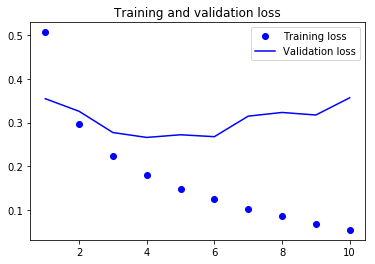

In [35]:
plot_history(history)

Now train the embedding and the dense layers jointly.

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('joint_trained_glove_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6263 - acc: 0.6993 - val_loss: 0.4894 - val_acc: 0.7674
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2844 - acc: 0.8841 - val_loss: 0.3718 - val_acc: 0.8416
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1456 - acc: 0.9453 - val_loss: 0.4893 - val_acc: 0.8314
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0630 - acc: 0.9770 - val_loss: 0.7695 - val_acc: 0.8096
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0250 - acc: 0.9917 - val_loss: 0.7871 - val_acc: 0.8282
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0106 - acc: 0.9964 - val_loss: 0.8382 - val_acc: 0.8398
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0046 - acc: 0.9983 - val_loss: 1.1882 - val_acc:

Let's plot its performance over time:

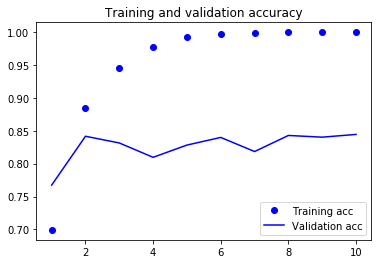

In [23]:
plot_history(history)

Obtain embedding_matrix1 from the embedding layer.

In [24]:
embedding_matrix1 = model.layers[0].get_weights()[0]

Now we train the embedding and the LSTM layers jointly.

In [25]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('joint_trained_LSTM_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.5062 - acc: 0.7501 - val_loss: 0.3544 - val_acc: 0.8534
Epoch 2/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.2966 - acc: 0.8801 - val_loss: 0.3256 - val_acc: 0.8724
Epoch 3/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.2231 - acc: 0.9139 - val_loss: 0.2771 - val_acc: 0.8910
Epoch 4/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.1793 - acc: 0.9316 - val_loss: 0.2660 - val_acc: 0.8968
Epoch 5/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.1492 - acc: 0.9461 - val_loss: 0.2720 - val_acc: 0.8914
Epoch 6/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.1252 - acc: 0.9556 - val_loss: 0.2677 - val_acc: 0.8938
Epoch 7/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.1036 - acc: 0.9634 - val_loss: 0.3146 - v

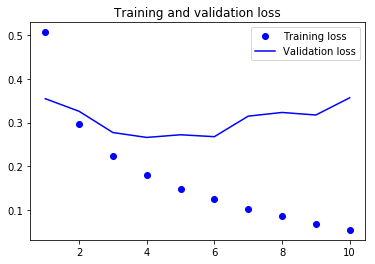

In [26]:
plot_history(history)

Obtain embedding_matrix2 from the embedding layer.

In [27]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [28]:
embedding_matrix2.shape

(10000, 100)

Implement the following three functions that measure the distance between words in the three different embeddings.

In [113]:
def word_dist(word1, word2, embedding_matrix):
    # fill in your code here
    v1 = embedding_matrix[word_index[word1]]
    v2 = embedding_matrix[word_index[word2]]
    return np.sqrt(np.sum((v1-v2)**2))
    
def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

In [114]:
print(dist_dense('better', 'worse'))
print(dist_dense('worst', 'worse'))

5.4918947
4.7906127


Observe the following reults and check whether dense embedding and LSTM embedding are better than the glove embedding on these results.

In [115]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
False
False


In [32]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
False


In [36]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [37]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

True
False
False


Find the nearest neighhor of a word for the three embeddings.

In [100]:
def NN_general(word, embedding_matrix):
    # Initalize
    NN = None
    NN_d = float('Inf')
    word_pos = embedding_matrix[word_index[word]]
    for ind in range(1, 10000):
        n_w = inverse_map[ind]
        if n_w != word: 
            n_dist = word_dist(n_w, word, embedding_matrix)
            if n_dist < NN_d:
                NN_d = n_dist
                NN = n_w
    return NN 

    
def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

In [116]:
print(NN_dense('like'))

ones


In [117]:
print(NN_dense('ones'))

those


List of all the words that the nearest neighbor changes in the LSTM embedding, while its nearest neighbor does not change in the dense embedding.

In [112]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: accessible available convenient
:::: accomplish achieve realize
:::: admirer eccentric admired
:::: adorable endearing cute
:::: advantage gain chance
:::: adventurous inventive imaginative
:::: amazed intrigued thrilled
:::: appeal appealing appeals
:::: attraction visitor amusement
:::: awarded received award
:::: awe inspiring delight
:::: awesome amazing incredible
:::: beautifully brilliantly wonderfully
:::: champion runner defending
:::: charisma charm intellect
:::: clearly certainly obviously
:::: colorful whimsical colourful
:::: convenient useful easier
:::: coolest strangest scariest
:::: creative innovative artistic
:::: crisp bright delicious
:::: cute goofy adorable
:::: earnest  spirited
:::: ease increasing continuing
:::: ecstasy booze cocaine
:::: effective appropriate necessary
:::: empathy disdain compassion
:::: energetic playful spirited
:::: engaging engage engaged
:::: enjoying enjoyed enjoy
:::: enough needed even
:::: excellently superbly fantastically


:::: wrongly inadvertently rightly
:::: yawn stinker groan
273 changes out of 1869


List of the words that its nearest neighbor changes in the dense embedding, while the nearest neighbor does not change in the LSTM embedding.

In [111]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: accomplished accomplishment importantly
:::: beauty beautiful obsession
:::: better even good
:::: blessing blessed divine
:::: charming quirky lovely
:::: cheerful sober dreamy
:::: clear neither yet
:::: continuity correctness relevance
:::: credible plausible consistent
:::: distinction regard exception
:::: dynamic transformation static
:::: eager reluctant hoping
:::: effectively thereby essentially
:::: enhance promote improve
:::: enjoyment happiness pleasure
:::: exciting entertaining interesting
:::: extraordinarily exceptionally incredibly
:::: famous renowned famed
:::: fresh plenty bring
:::: fun terrific stuff
:::: glamorous flashy stylish
:::: glow flashes glowing
:::: groundbreaking controversial landmark
:::: hilarious riveting amusing
:::: honesty modesty clarity
:::: impress distract convince
:::: improve improved enhance
:::: inspirational uplifting inspiring
:::: lover friend boyfriend
:::: loving wonderful caring
:::: loyal trusted followers
:::: master renown

Get the list of the words that each word's nearest neighbor is different in glove embedding, dense embedding and LSTM embedding.

In [118]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: accomplishment remarkable accomplished importantly
:::: ambitious promising successful innovative
:::: appropriate proper necessary certain
:::: avid admirer brother's intrigued
:::: bargain deals meantime offering
:::: believable contrived captivating likable
:::: beloved loved grandmother hated
:::: bliss it's who's today's
:::: bloom hardy frost movie's
:::: bravo hooper zane stewart's
:::: charm charisma charms wit
:::: cheer delight cry cheers
:::: clever clumsy ingenious inventive
:::: compliment liking understatement i've
:::: consistent inconsistent contrary manner
:::: contribution benefit exceptional achievement
:::: conveniently incidentally curiously inexplicably
:::: darling peters they'll shouldn't
:::: dashing it's zelah kids'
:::: elevate emphasize woman's we've
:::: entertains betrays reminds informs
:::: excels it's you've victoria's
:::: fair kind judged sort
:::: fascinating interesting captivating intriguing
:::: fiery spirited passionate furious
:::: fine unu

Get the list of words that dense embedding and LSTM embedding agree on the nearest neighbor but do not agree with the glove embedding.

In [119]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: admirably excellently masterfully masterfully
:::: advanced advance integrated integrated
:::: afford willing wanting wanting
:::: amusing hilarious comical comical
:::: appealing compelling appeal appeal
:::: authentic imitation fashioned fashioned
:::: available provided addition addition
:::: bright dark gray gray
:::: catchy seductive tunes tunes
:::: clean enough ensure ensure
:::: comfortable staying easy easy
:::: compassion empathy kindness kindness
:::: confident satisfied optimistic optimistic
:::: cool hot warm warm
:::: courage honesty determination determination
:::: cure treat miracle miracle
:::: dazzling breathtaking mesmerizing mesmerizing
:::: delight joy awe awe
:::: dignity respect conscience conscience
:::: divine god mystical mystical
:::: efficient effective simpler simpler
:::: effortlessly clumsily masterfully masterfully
:::: enhances demonstrates conveys conveys
:::: enlightenment perfection civilization civilization
:::: excellent terrific superb superb

Get the list of words that glove, dense, LSTM embeddings all agree on the nearest neighbor.

In [120]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound notwithstanding notwithstanding notwithstanding
:::: abundance hence hence hence
:::: acclaim garnered garnered garnered
:::: acclaimed renowned renowned renowned
:::: accurate precise precise precise
:::: accurately correctly correctly correctly
:::: achievement achievements achievements achievements
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admiration affection affection affection
:::: admire appreciate appreciate appreciate
:::: adore despise despise despise
:::: affection admiration admiration admiration
:::: amazing incredible incredible incredible
:::: amazingly astonishingly astonishingly astonishingly
:::: ample sufficient sufficient sufficient
:::: amuse annoy annoy annoy
:::: angel gabriel gabriel gabriel
:::: applaud admire admire admire
:::: appreciate admire admire admire
:::: appreciated appreciate appreciate appreciate
:::: assure ensure ensure e

:::: intriguing interesting interesting interesting
:::: inventive imaginative imaginative imaginative
:::: irresistible seductive seductive seductive
:::: keen eager eager eager
:::: kindness compassion compassion compassion
:::: lavish gifts gifts gifts
:::: lead leads leads leads
:::: leading led led led
:::: leads lead lead lead
:::: legendary famed famed famed
:::: liberty freedom freedom freedom
:::: likable likeable likeable likeable
:::: lively spirited spirited spirited
:::: logical rational rational rational
:::: love passion passion passion
:::: lovely gorgeous gorgeous gorgeous
:::: loyalty devotion devotion devotion
:::: lucky fortunate fortunate fortunate
:::: lush gorgeous gorgeous gorgeous
:::: luxury hotel hotel hotel
:::: lyrical poetic poetic poetic
:::: magic magical magical magical
:::: magical mystical mystical mystical
:::: magnificent splendid splendid splendid
:::: marvel comics comics comics
:::: marvellous marvelous marvelous marvelous
:::: masterful mesmeriz

:::: annoy confuse confuse confuse
:::: annoyance seeming seeming seeming
:::: annoyed irritated irritated irritated
:::: annoying irritating irritating irritating
:::: annoyingly hilariously hilariously hilariously
:::: apocalyptic nightmarish nightmarish nightmarish
:::: arbitrary illogical illogical illogical
:::: arrogant cynical cynical cynical
:::: ashamed embarrassed embarrassed embarrassed
:::: assault attack attack attack
:::: atrocities brutality brutality brutality
:::: attack attacks attacks attacks
:::: attacks attack attack attack
:::: avenge revenge revenge revenge
:::: awful horrible horrible horrible
:::: awfulness cheesiness cheesiness cheesiness
:::: awkward uncomfortable uncomfortable uncomfortable
:::: bad worse worse worse
:::: baffled puzzled puzzled puzzled
:::: banal cliched cliched cliched
:::: bashing hating hating hating
:::: bastard bitch bitch bitch
:::: begging pretending pretending pretending
:::: bent turning turning turning
:::: betrays pretends preten

:::: fails fail fail fail
:::: failures shortcomings shortcomings shortcomings
:::: faint ominous ominous ominous
:::: fake phony phony phony
:::: fallen falling falling falling
:::: falling rising rising rising
:::: falls rises rises rises
:::: false bogus bogus bogus
:::: fanatic fanatics fanatics fanatics
:::: fanatics fanatic fanatic fanatic
:::: farce melodrama melodrama melodrama
:::: fascist neo neo neo
:::: fat milk milk milk
:::: fatal accidental accidental accidental
:::: fault faults faults faults
:::: faults fault fault fault
:::: fear worry worry worry
:::: fears concerns concerns concerns
:::: fell slipped slipped slipped
:::: fever sickness sickness sickness
:::: fiction novels novels novels
:::: fiend maniac maniac maniac
:::: fierce intense intense intense
:::: filth idiocy idiocy idiocy
:::: fist shaking shaking shaking
:::: flair subtlety subtlety subtlety
:::: flaw flaws flaws flaws
:::: flee fleeing fleeing fleeing
:::: fleeing flee flee flee
:::: foul throws throw

:::: overdone overblown overblown overblown
:::: overwhelming spite spite spite
:::: pains pain pain pain
:::: paranoia cynicism cynicism cynicism
:::: parody spoof spoof spoof
:::: passive static static static
:::: pathetic pitiful pitiful pitiful
:::: peril danger danger danger
:::: petty crooks crooks crooks
:::: phony bogus bogus bogus
:::: pig pigs pigs pigs
:::: pitiful pathetic pathetic pathetic
:::: pity shame shame shame
:::: plague scare scare scare
:::: plot plots plots plots
:::: poison kill kill kill
:::: prejudice prejudices prejudices prejudices
:::: prejudices stereotypes stereotypes stereotypes
:::: preposterous ludicrous ludicrous ludicrous
:::: pretend pretending pretending pretending
:::: primitive evolved evolved evolved
:::: prison jail jail jail
:::: prisoner prisoners prisoners prisoners
:::: problem problems problems problems
:::: profanity nudity nudity nudity
:::: provocative outrageous outrageous outrageous
:::: punk hardcore hardcore hardcore
:::: puppet pu

:::: unrealistic illogical illogical illogical
:::: unsettling unnerving unnerving unnerving
:::: unstable insecure insecure insecure
:::: unsuccessful successful successful successful
:::: unsuspecting hapless hapless hapless
:::: untrue preposterous preposterous preposterous
:::: unwilling reluctant reluctant reluctant
:::: upset stunned stunned stunned
:::: utterly totally totally totally
:::: vague ambiguous ambiguous ambiguous
:::: vanity esquire esquire esquire
:::: vengeance revenge revenge revenge
:::: vengeful conniving conniving conniving
:::: vice president president president
:::: vicious murderous murderous murderous
:::: vile despicable despicable despicable
:::: violently brutally brutally brutally
:::: virus infected infected infected
:::: wasting wasted wasted wasted
:::: weak weaker weaker weaker
:::: weird strange strange strange
:::: whiny dopey dopey dopey
:::: wicked mischievous mischievous mischievous
:::: woefully hopelessly hopelessly hopelessly
:::: worn wore 

## Visualize the three embeddings using t-SNE. We want to see how the positive words and negative words are spreaded in two dimensional space.

In [121]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [122]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [104]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1869, 100), (1869, 100), (1869, 100))

In [105]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

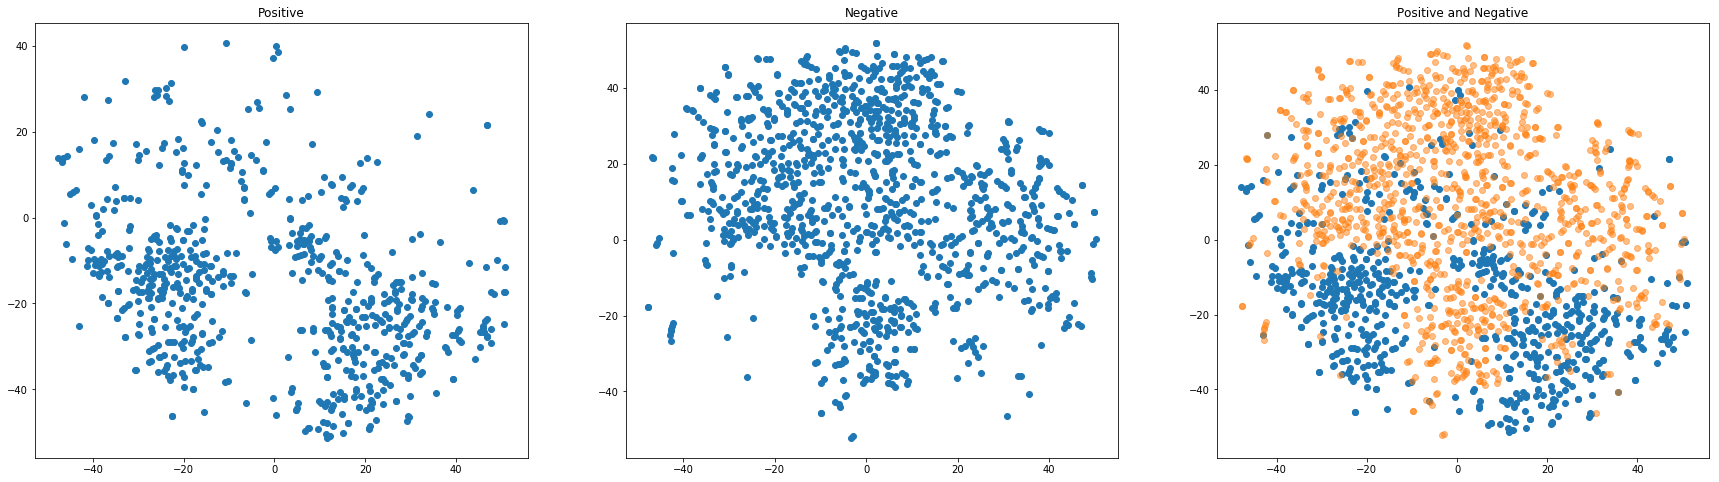

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [107]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [109]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

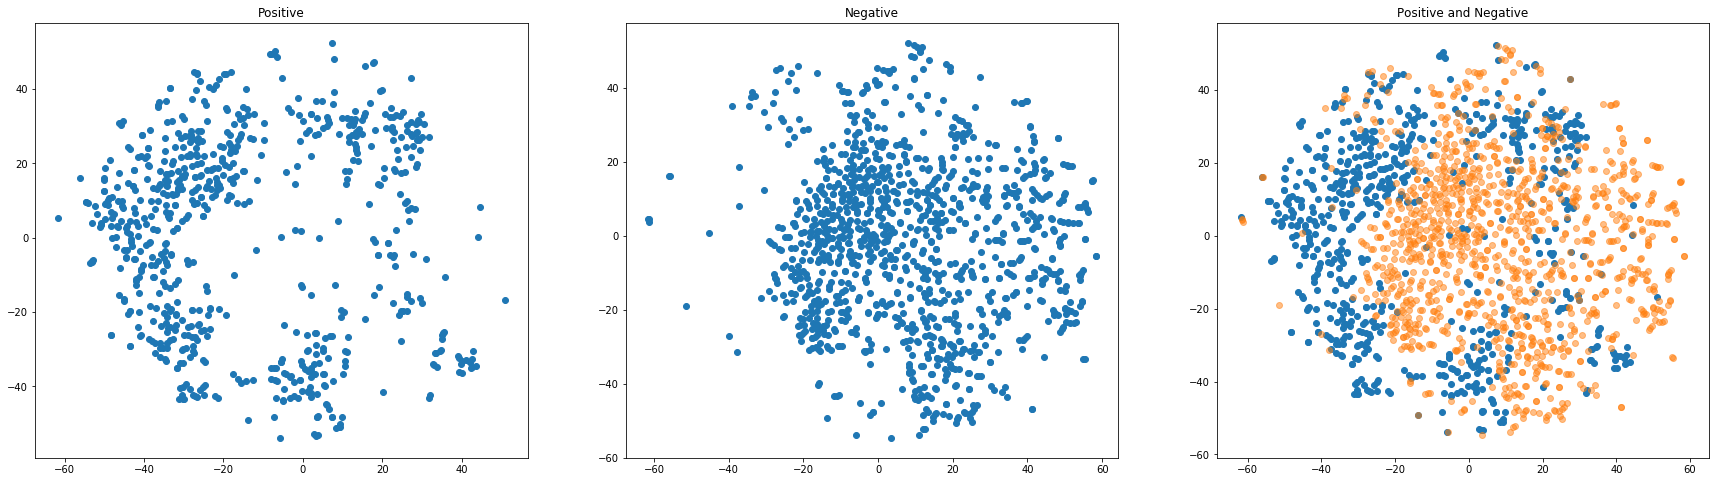

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

Next we implement the class distance function for the three embeddings.

In [123]:
from itertools import combinations
def class_dist(L_POS, L_NEG, embedding_matrix):
    # fill in your code here
    # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
    # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
    # We return d12/d as the result
    d12 = 0
    d = 0
    
    for word1 in L_POS:
        for word2 in L_NEG:
            d12 += word_dist(word1, word2, embedding_matrix)
    
    d12 /= len(L_POS)
    
    temp = L_POS + L_NEG
    for pair in combinations(temp, 2):
        d += word_dist(pair[0], pair[1], embedding_matrix)
    
    d /= len(temp)
    
    return d12/d
        
    

def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [124]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.2666442314579922 1.276150028237595 1.2707493956530098
Relative improvments:
Dense: 0.7504709328412628
LSTM: 0.3240976505527751


Now we double check the chosen embedding is indeeded better. We use the chosen embedding and LSTM model and check whether the valdidation accuracy is better.

In [125]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('dense_embedding_LSTM_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.3423 - acc: 0.8579 - val_loss: 0.3290 - val_acc: 0.8506
Epoch 2/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.2562 - acc: 0.8981 - val_loss: 0.3925 - val_acc: 0.8554
Epoch 3/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.2253 - acc: 0.9125 - val_loss: 0.2815 - val_acc: 0.8842
Epoch 4/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.2065 - acc: 0.9216 - val_loss: 0.3311 - val_acc: 0.8724
Epoch 5/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.1947 - acc: 0.9248 - val_loss: 0.2660 - val_acc: 0.8924
Epoch 6/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.1836 - acc: 0.9308 - val_loss: 0.2660 - val_acc: 0.8924
Epoch 7/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.1764 - acc: 0.9335 - val_loss: 0.2679 - v

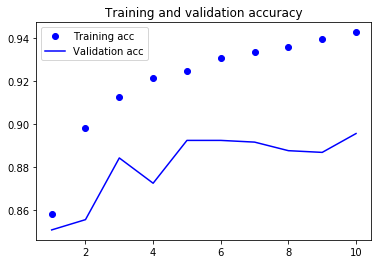

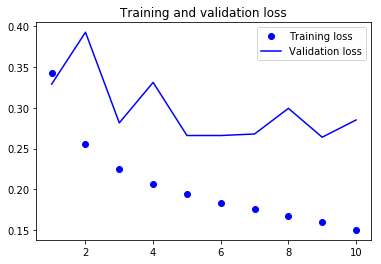

In [126]:
plot_history(history)

In [127]:
from keras.layers import GRU
import keras

# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,),
    keras.callbacks.ModelCheckpoint(filepath='GRUs_model_large.h5', monitor='val_loss', save_best_only=True,)]

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True))
model.add(GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, shuffle=True,
                    epochs=200,
                    batch_size=128,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 130s 7ms/step - loss: 0.5055 - acc: 0.7500 - val_loss: 0.3499 - val_acc: 0.8486
Epoch 2/200
20000/20000 [==============================] - 129s 6ms/step - loss: 0.3019 - acc: 0.8771 - val_loss: 0.2982 - val_acc: 0.8746
Epoch 3/200
20000/20000 [==============================] - 128s 6ms/step - loss: 0.2609 - acc: 0.8934 - val_loss: 0.2890 - val_acc: 0.8832
Epoch 4/200
20000/20000 [==============================] - 128s 6ms/step - loss: 0.2485 - acc: 0.8990 - val_loss: 0.2663 - val_acc: 0.8906
Epoch 5/200
20000/20000 [==============================] - 129s 6ms/step - loss: 0.2342 - acc: 0.9064 - val_loss: 0.2683 - val_acc: 0.8916
Epoch 6/200
20000/20000 [==============================] - 128s 6ms/step - loss: 0.2299 - acc: 0.9078 - val_loss: 0.2596 - val_acc: 0.8932
Epoch 7/200
20000/20000 [==============================] - 129s 6ms/step - loss: 0.2263 - acc: 0.9127 - val_loss: 0.2

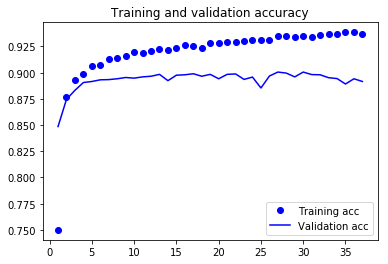

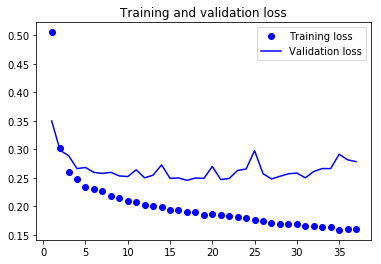

In [128]:
plot_history(history)

Note our model is much better than previous models on overfitting.

Now we load the best model back. And then we evaluate the model using the test data.

In [129]:
model = keras.models.load_model('GRUs_model_large.h5')

In [130]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [131]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 89s 4ms/step


[0.24230827863276005, 0.9022]

We did beat the 90% of accuracy. Pay attention to the tecniques we used to achieve this goal. To save time, I only showed one model above. In fact, I tried many different models and optimizers. A few of these combinations should be able to beat 90% of accuracy. The above is the one I think that is most promising. The model is also realtively simple.